In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action='ignore')

burnoutDf = pd.read_csv('C:/Users/Jhansee Ram/Downloads/employee_burnout_analysis.csv')

burnoutDf = burnoutDf.drop('Employee ID', axis=1)
missing_target_rows = burnoutDf.loc[burnoutDf['Burn Rate'].isna(), :].index
burnoutDf = burnoutDf.drop(missing_target_rows, axis=0).reset_index(drop=True)

for column in ['Resource Allocation', 'Mental Fatigue Score']:
    burnoutDf[column] = burnoutDf[column].fillna(burnoutDf[column].mean())

# Extract date features
burnoutDf['Date of Joining'] = pd.to_datetime(burnoutDf['Date of Joining'])
burnoutDf['Join Month'] = burnoutDf['Date of Joining'].apply(lambda x: x.month)
burnoutDf['Join Day'] = burnoutDf['Date of Joining'].apply(lambda x: x.day)
burnoutDf = burnoutDf.drop('Date of Joining', axis=1)

# Binary encoding
burnoutDf['Gender'] = burnoutDf['Gender'].replace({'Female': 0, 'Male': 1})
burnoutDf['Company Type'] = burnoutDf['Company Type'].replace({'Product': 0, 'Service': 1})
burnoutDf['WFH Setup Available'] = burnoutDf['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

y = burnoutDf['Burn Rate']
X = burnoutDf.drop('Burn Rate', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Train and evaluate models
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                         Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " Model is trained successfully.")

for name, model in models.items():
    print(name + " Score: {:.7f}".format(model.score(X_test, y_test)))


                     Linear Regression Model is trained successfully.
                   K-Nearest Neighbors Model is trained successfully.
                         Random Forest Model is trained successfully.
                     Linear Regression Score: 0.8707484
                   K-Nearest Neighbors Score: 0.8557505
                         Random Forest Score: 0.8968944


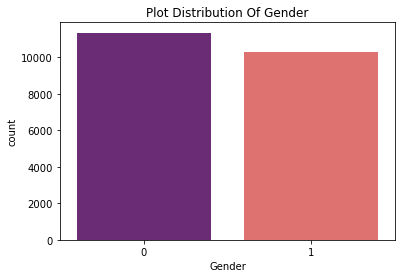

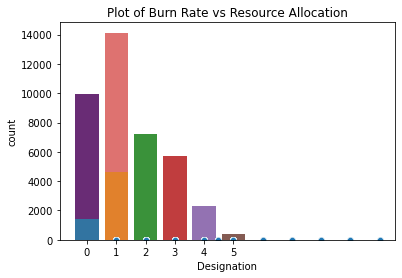

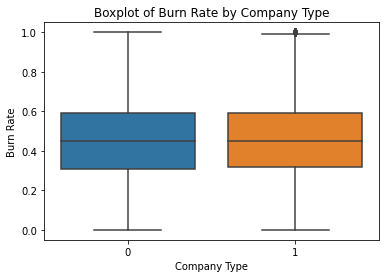

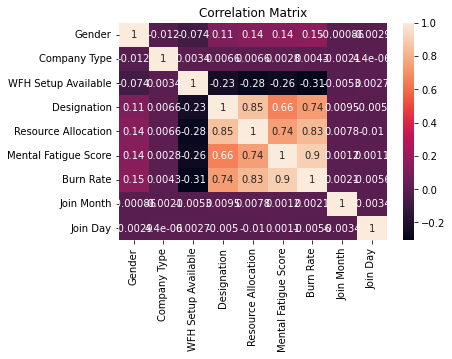

In [2]:
def visualize_data(df):
    sns.countplot(x="Gender", data=df, palette='magma')
    plt.title("Plot Distribution Of Gender")
    plt.show()

    sns.countplot(x="Company Type", data=df, palette='magma')

    sns.countplot(x="WFH Setup Available", data=df, palette='magma')

    sns.countplot(x="Designation", data=df)

    sns.scatterplot(x="Resource Allocation", y="Burn Rate", data=df)
    plt.title("Plot of Burn Rate vs Resource Allocation")
    plt.show()

    sns.boxplot(x="Company Type", y="Burn Rate", data=df)
    plt.title("Boxplot of Burn Rate by Company Type")
    plt.show()

    corr = df.corr()
    sns.heatmap(corr, annot=True)
    plt.title("Correlation Matrix")
    plt.show()
visualize_data(burnoutDf)